Import Iris dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
irisData= load_iris()
irisData

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Select two features from data

In [4]:
X = irisData.data[:, 2:4] 

In [5]:
scale= StandardScaler()
X_scale= scale.fit_transform(X)

In [6]:
pca= PCA(n_components=2)
XPCA= pca.fit_transform(X)

Elow Chart to find clustering

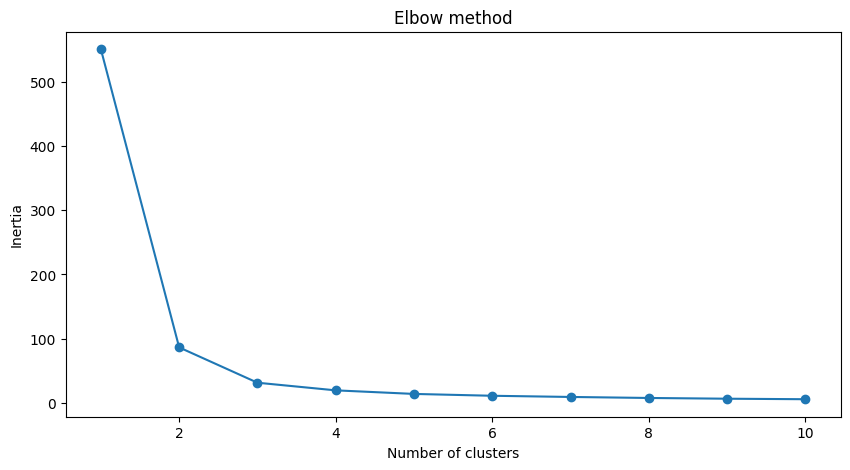

In [8]:
import warnings
warnings.filterwarnings('ignore')

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=40).fit(X)
    inertia.append(kmeans.inertia_)

#plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

For numbers of clusters 2 it will be best for clustering

### Part 2

Import Heart dataset

In [10]:
import pandas as pd
import seaborn as sns

heartData= pd.read_csv("heart.csv")
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Check for null values

In [11]:
heartData.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Summary of heart Data

In [12]:
heartData.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Boxplot

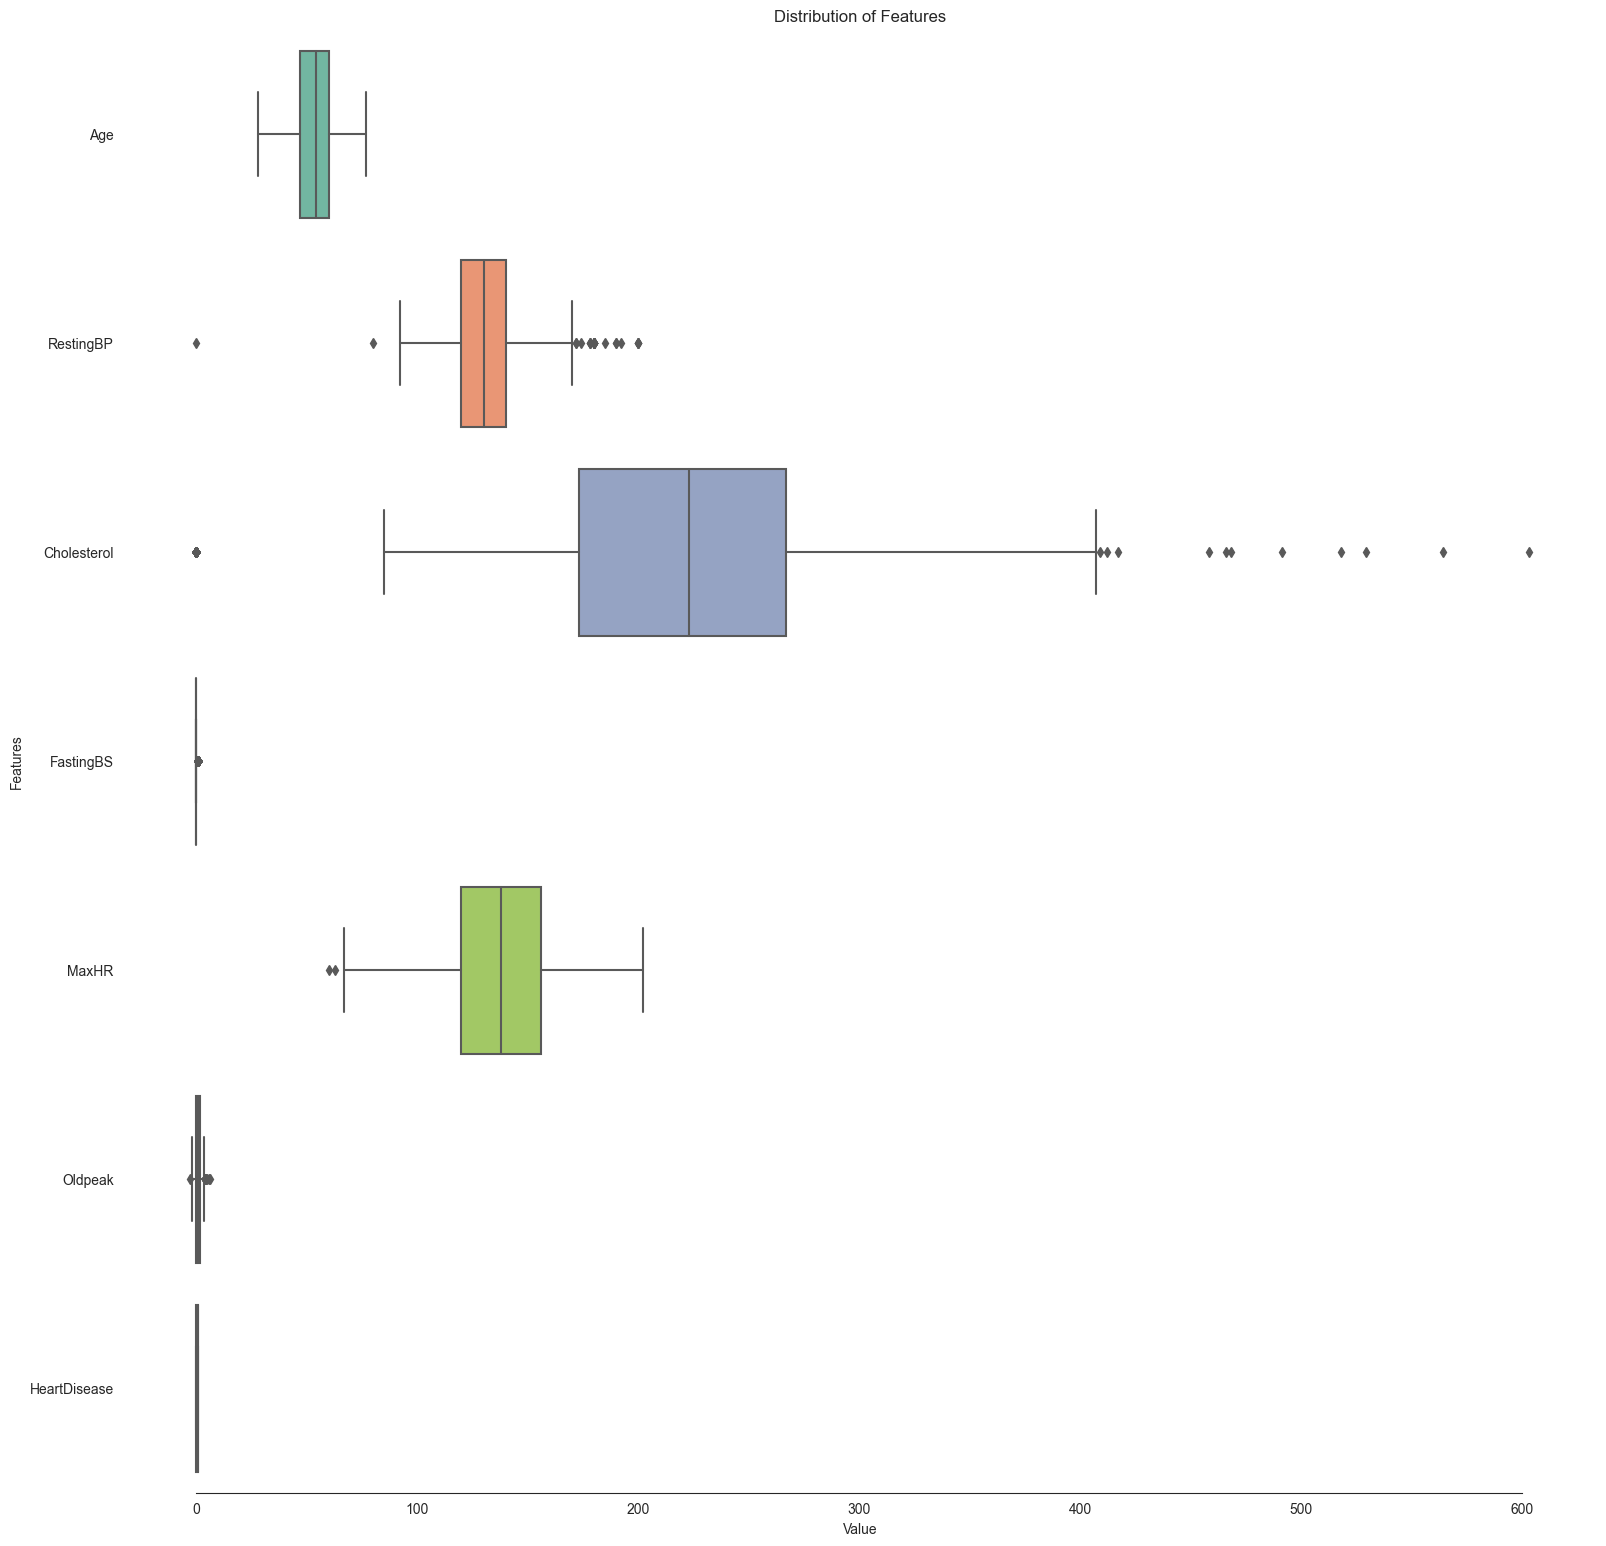

In [17]:
heartDataExclude= heartData.select_dtypes(exclude=['object'])

sns.set_style("white")

f, ax = plt.subplots(figsize=(19, 19))

ax= sns.boxplot(data=heartDataExclude, orient="h", palette="Set2")

ax.set(ylabel="Features")
ax.set(xlabel="Value")
ax.set(title="Distribution of Features")
sns.despine(trim=True, left=True)

In [19]:
from scipy import stats

column = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
z_scores = stats.zscore(heartData[column])

# Define a threshold for outlier detection (e.g., |z-score| > 3)
threshold = 3

# Find and remove outliers based on the threshold
outliers = heartData[(abs(z_scores) > threshold).any(axis=1)]
noOutlier = heartData[~heartData.index.isin(outliers.index)]

print("Original dataset shape:", heartData.shape)
print("Dataset shape after removing outliers:", noOutlier.shape)

Original dataset shape: (918, 12)
Dataset shape after removing outliers: (899, 12)


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb = LabelEncoder()
noOutlier['ChestPainType'] = lb.fit_transform(noOutlier['ChestPainType'])
noOutlier['Sex'] = lb.fit_transform(noOutlier['Sex'])
noOutlier['RestingECG'] = lb.fit_transform(noOutlier['RestingECG'])
noOutlier['ExerciseAngina'] = lb.fit_transform(noOutlier['ExerciseAngina'])
noOutlier['ST_Slope'] = lb.fit_transform(noOutlier['ST_Slope'])
noOutlier.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()

# Apply scaling to  columns
scaled = scaler.fit_transform(noOutlier)
scaled = pd.DataFrame(scaled, columns=noOutlier.columns)

print(scaled.head())

        Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS   
0 -1.428154  0.515943       0.224572   0.465900     0.849636  -0.550362  \
1 -0.475855 -1.938199       1.270637   1.634714    -0.168122  -0.550362   
2 -1.745588  0.515943       0.224572  -0.118507     0.793612  -0.550362   
3 -0.581666 -1.938199      -0.821492   0.349019     0.149344  -0.550362   
4  0.053200  0.515943       1.270637   1.050307    -0.028064  -0.550362   

   RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0    0.014143  1.384320       -0.822945 -0.855469  1.042496     -1.099475  
1    0.014143  0.752973       -0.822945  0.137516 -0.622165      0.909525  
2    1.603415 -1.535661       -0.822945 -0.855469  1.042496     -1.099475  
3    0.014143 -1.141069        1.215148  0.634008 -0.622165      0.909525  
4    0.014143 -0.588640       -0.822945 -0.855469  1.042496     -1.099475  


Train and split the data

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

x= scaled.drop('HeartDisease', axis=1)
y= noOutlier['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)


### 3 Models

In [25]:
modelClassifer={
    "SVM":SVC(),
    "LR": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
}

In [29]:
# predict and get accuracy 
for name, model in modelClassifer.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Accuracy of ", name, " is ", accuracy_score(y_test, y_pred))

Accuracy of  SVM  is  0.8944444444444445
Accuracy of  LR  is  0.8722222222222222
Accuracy of  RandomForest  is  0.8944444444444445


Here we can see that accuracy of random forest and svm are same with highest accuracy which are best compare to logistic regression model

applying pca

In [33]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)

x_pca = pca.fit_transform(scaled)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=40)

for name, model in modelClassifer.items():
    model.fit(x_train_pca, y_train_pca)
    y_pred_pca = model.predict(x_test_pca)
    accuracy= accuracy_score(y_test_pca, y_pred_pca)
    print(name, accuracy)

SVM 0.9277777777777778
LR 0.9333333333333333
RandomForest 0.9


as we can see that by applying pca to all three models the accuracy are increase and here we can see that logistic regression changed a lot and has best accuracy amoung all three.